This is an analysis of pulsar data taken here : https://archive.ics.uci.edu/ml/datasets/HTRU2

The goal is to classify candidates into pulsar and non-pulsar classes. 

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. 

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import and arrange data

In [27]:
## import data
train_data = pd.read_csv("../projet_pulsar/pulsar_data_train.csv")
test_data = pd.read_csv("../projet_pulsar/pulsar_data_test.csv")
train_data.head()
# remove spaces in names
print(train_data.columns)
train_data.columns = [c.replace(' ', '') for c in train_data.columns]
test_data.columns = [c.replace(' ', '') for c in test_data.columns]
print(train_data.columns)


Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')
Index(['Meanoftheintegratedprofile', 'Standarddeviationoftheintegratedprofile',
       'Excesskurtosisoftheintegratedprofile',
       'Skewnessoftheintegratedprofile', 'MeanoftheDM-SNRcurve',
       'StandarddeviationoftheDM-SNRcurve', 'ExcesskurtosisoftheDM-SNRcurve',
       'SkewnessoftheDM-SNRcurve', 'target_class'],
      dtype='object')


## Explore data 


In [28]:
print("train_data shape : ")
train_data.shape

train_data shape : 


(12528, 9)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Meanoftheintegratedprofile               12528 non-null  float64
 1   Standarddeviationoftheintegratedprofile  12528 non-null  float64
 2   Excesskurtosisoftheintegratedprofile     10793 non-null  float64
 3   Skewnessoftheintegratedprofile           12528 non-null  float64
 4   MeanoftheDM-SNRcurve                     12528 non-null  float64
 5   StandarddeviationoftheDM-SNRcurve        11350 non-null  float64
 6   ExcesskurtosisoftheDM-SNRcurve           12528 non-null  float64
 7   SkewnessoftheDM-SNRcurve                 11903 non-null  float64
 8   target_class                             12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [30]:
## null data
print(train_data.isnull().sum())
#plt.figure(figsize=(8,8))
#sns.heatmap(train_data.isnull(),cmap= 'cividis')

Meanoftheintegratedprofile                    0
Standarddeviationoftheintegratedprofile       0
Excesskurtosisoftheintegratedprofile       1735
Skewnessoftheintegratedprofile                0
MeanoftheDM-SNRcurve                          0
StandarddeviationoftheDM-SNRcurve          1178
ExcesskurtosisoftheDM-SNRcurve                0
SkewnessoftheDM-SNRcurve                    625
target_class                                  0
dtype: int64


null values in columns : 
Excesskurtosisoftheintegratedprofile
StandarddeviationoftheDM-SNRcurve
SkewnessoftheDM-SNRcurve 

### Data distribution & Outliers exploration: 


In [31]:
train_data.describe()

,Meanoftheintegratedprofile,Standarddeviationoftheintegratedprofile,Excesskurtosisoftheintegratedprofile,Skewnessoftheintegratedprofile,MeanoftheDM-SNRcurve,StandarddeviationoftheDM-SNRcurve,ExcesskurtosisoftheDM-SNRcurve,SkewnessoftheDM-SNRcurve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


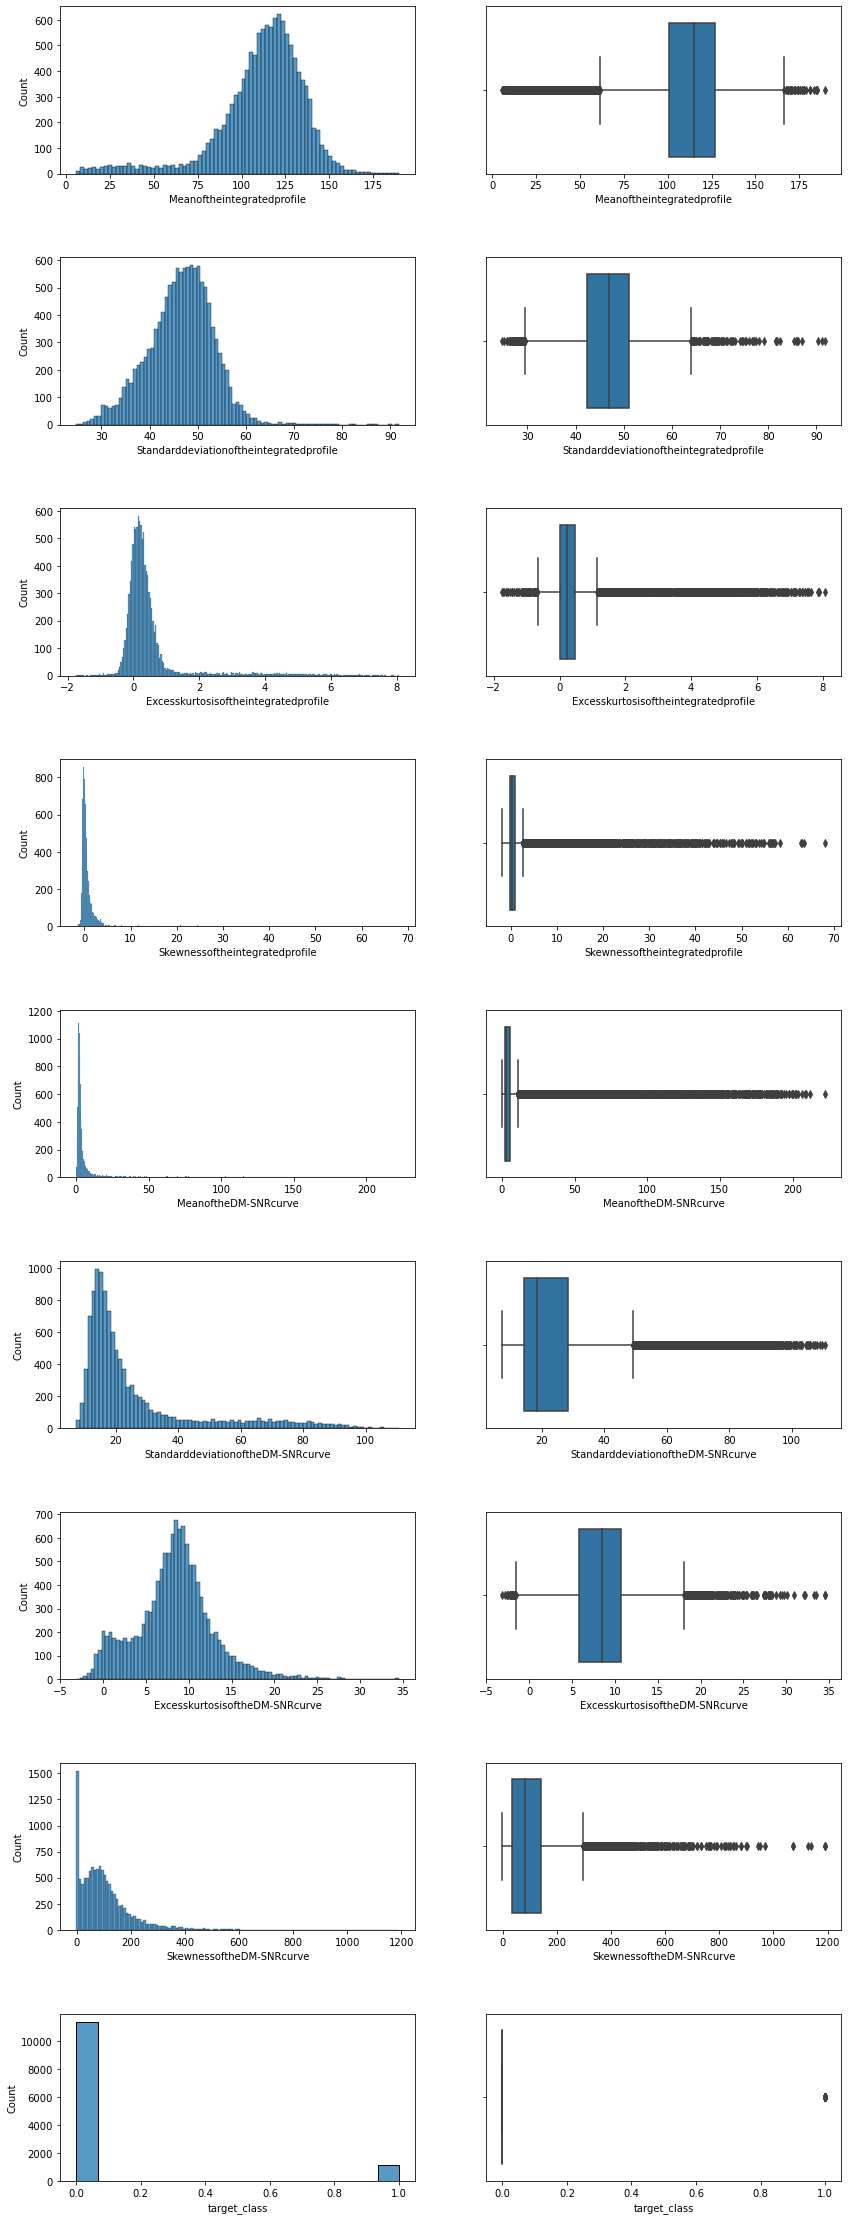

In [32]:
fig, axes = plt.subplots(nrows=9,ncols=2,  figsize=(14, 40))
fig.subplots_adjust(hspace = .5, wspace=.2)
for i in range(0,len(train_data.columns)):
    sns.histplot(x=train_data[train_data.columns[i]], ax=axes[i][0])
    sns.boxplot(x=train_data[train_data.columns[i]], ax=axes[i][1])

In [33]:
# duplicates : 
print("target_class : \n", train_data['target_class'].value_counts())
print("\n Meanoftheintegratedprofile : \n", train_data['Meanoftheintegratedprofile'].value_counts())
print("Standarddeviationoftheintegratedprofile : \n", train_data['Standarddeviationoftheintegratedprofile'].value_counts())
print("Excesskurtosisoftheintegratedprofile : \n", train_data['Excesskurtosisoftheintegratedprofile'].value_counts())
print("Skewnessoftheintegratedprofile : \n", train_data['Skewnessoftheintegratedprofile'].value_counts())
print("MeanoftheDM-SNRcurve : \n", train_data['MeanoftheDM-SNRcurve'].value_counts())
print("StandarddeviationoftheDM-SNRcurve : \n", train_data['StandarddeviationoftheDM-SNRcurve'].value_counts())
print("ExcesskurtosisoftheDM-SNRcurve : \n", train_data['ExcesskurtosisoftheDM-SNRcurve'].value_counts())
print("SkewnessoftheDM-SNRcurve : \n", train_data['SkewnessoftheDM-SNRcurve'].value_counts())
train_data.dtypes


target_class : 
 0.0    11375
1.0     1153
Name: target_class, dtype: int64

 Meanoftheintegratedprofile : 
 106.710938    8
129.210938    7
105.242188    7
124.429688    7
123.031250    7
             ..
96.781250     1
39.648438     1
132.140625    1
164.640625    1
135.664062    1
Name: Meanoftheintegratedprofile, Length: 7192, dtype: int64
Standarddeviationoftheintegratedprofile : 
 44.024851    2
47.343551    2
49.196907    2
44.774773    2
48.622178    2
            ..
49.415603    1
52.590514    1
55.792865    1
50.080199    1
50.472256    1
Name: Standarddeviationoftheintegratedprofile, Length: 12510, dtype: int64
Excesskurtosisoftheintegratedprofile : 
  0.375485    1
-0.122189    1
 0.394809    1
-0.299902    1
 0.231473    1
            ..
-0.097628    1
 4.352559    1
 0.359590    1
 0.182674    1
 0.346178    1
Name: Excesskurtosisoftheintegratedprofile, Length: 10793, dtype: int64
Skewnessoftheintegratedprofile : 
 -0.013165     1
 0.853675     1
 13.442730    1
 0.425261

Meanoftheintegratedprofile                 float64
Standarddeviationoftheintegratedprofile    float64
Excesskurtosisoftheintegratedprofile       float64
Skewnessoftheintegratedprofile             float64
MeanoftheDM-SNRcurve                       float64
StandarddeviationoftheDM-SNRcurve          float64
ExcesskurtosisoftheDM-SNRcurve             float64
SkewnessoftheDM-SNRcurve                   float64
target_class                               float64
dtype: object

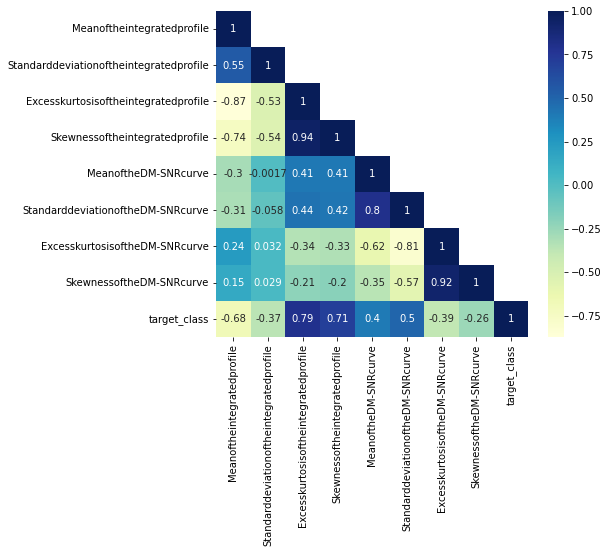

In [34]:
# Correlation HeatMap : 
plt.figure(figsize = (7, 6))
correlMap = train_data.corr()
sns.heatmap(correlMap, xticklabels=correlMap.columns, yticklabels=correlMap.columns, annot=True, mask=np.triu(train_data.corr(),+1), cmap="YlGnBu")
plt.show()

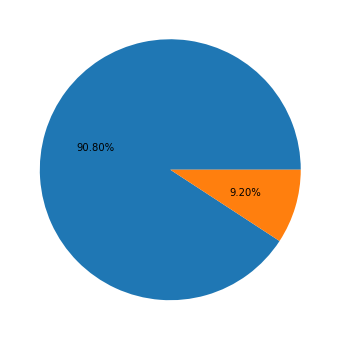

In [7]:
# Check results distribution 
#sns.countplot(x=train_data.target_class)
plt.figure(figsize=(8,6))
plt.pie(x=train_data.target_class.value_counts(normalize=True),autopct='%.2f%%')
plt.show()


## Arrange Data 

In [8]:
# Arrange Null data : 

# Start with a simple imputer using the mean value of the column 
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_train_data = pd.DataFrame(my_imputer.fit_transform(train_data))

# Imputation removed column names; put them back
imputed_train_data.columns = train_data.columns
print(imputed_train_data.isnull().sum())


Meanoftheintegratedprofile                 0
Standarddeviationoftheintegratedprofile    0
Excesskurtosisoftheintegratedprofile       0
Skewnessoftheintegratedprofile             0
MeanoftheDM-SNRcurve                       0
StandarddeviationoftheDM-SNRcurve          0
ExcesskurtosisoftheDM-SNRcurve             0
SkewnessoftheDM-SNRcurve                   0
target_class                               0
dtype: int64


Number of Outliers :
Meanoftheintegratedprofile                  717
Standarddeviationoftheintegratedprofile     178
Excesskurtosisoftheintegratedprofile       1004
Skewnessoftheintegratedprofile             1340
MeanoftheDM-SNRcurve                       2047
StandarddeviationoftheDM-SNRcurve          1693
ExcesskurtosisoftheDM-SNRcurve              349
SkewnessoftheDM-SNRcurve                    696
target_class                               1153
dtype: int64


(-100.0, 1300.0)

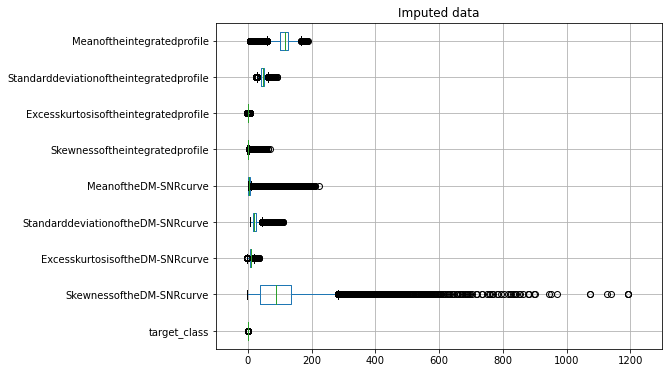

In [9]:
# Outliers 
Q1 = imputed_train_data.quantile(0.25)
Q3 = imputed_train_data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers :')
print(((imputed_train_data < (lower_range)) | (imputed_train_data > (upper_range))).sum())

#print(list(imputed_train_data.columns))
coll = list(imputed_train_data.columns)
coll.reverse()


plt.figure(figsize=(8,6))
plt.title('Imputed data')
imputed_train_data.boxplot(vert=0, column=coll)
plt.xlim(-100, 1300)


(-100.0, 1300.0)

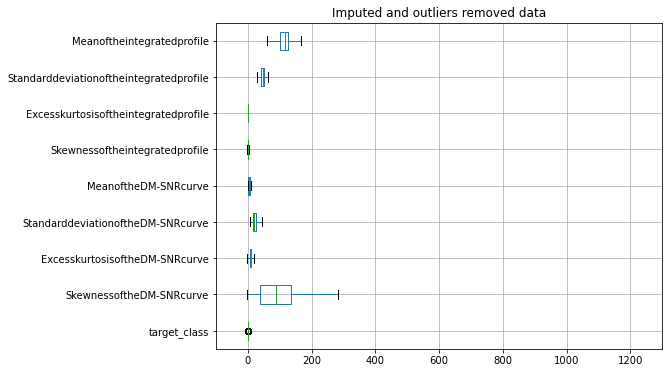

In [10]:
# Not a lot of outliers :  remove or cap them. 
# In physics I am not used to just remove data, so I will cap them using an Interquartile Range (IQR)

imputed_train_data_outl = imputed_train_data.copy()
#for colu in coll[:-1]: # exclude target class !
for colu in imputed_train_data_outl.columns[:-1]:    
    imputed_train_data_outl[colu] = np.where(imputed_train_data_outl[colu]>upper_range[colu],
                                             upper_range[colu],imputed_train_data_outl[colu])
    imputed_train_data_outl[colu] = np.where(imputed_train_data_outl[colu]<lower_range[colu],
                                             lower_range[colu],imputed_train_data_outl[colu])

plt.figure(figsize=(8,6))
plt.title('Imputed and outliers removed data')
imputed_train_data_outl.boxplot(vert=0, column=coll)
plt.xlim(-100, 1300)


<AxesSubplot:>

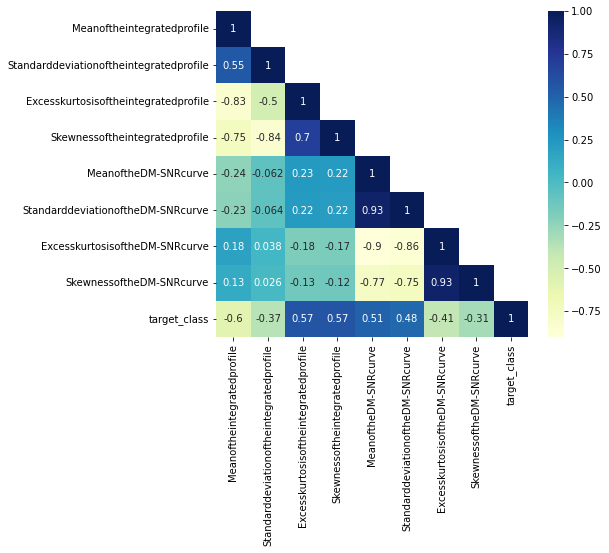

In [11]:
# Correlation plot after outlier treatment
plt.figure(figsize = (7, 6))
correlMapFin = imputed_train_data_outl.corr()
sns.heatmap(correlMapFin, xticklabels=correlMapFin.columns, yticklabels=correlMapFin.columns, annot=True, mask=np.triu(imputed_train_data_outl.corr(),+1), cmap="YlGnBu")


## Feature Selection

Some data are still highly correlated but since there is only 8 features we can keep them all... 

## Models 

In [37]:
# Split data
from sklearn.model_selection import train_test_split

X = imputed_train_data_outl.drop('target_class',axis=1)
y = imputed_train_data_outl.target_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)
#X.head()

,Meanoftheintegratedprofile,Standarddeviationoftheintegratedprofile,Excesskurtosisoftheintegratedprofile,Skewnessoftheintegratedprofile,MeanoftheDM-SNRcurve,StandarddeviationoftheDM-SNRcurve,ExcesskurtosisoftheDM-SNRcurve,SkewnessoftheDM-SNRcurve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,2.613147,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,10.667329,26.351318,2.958066,7.197842
4,84.804688,36.117659,0.825013,2.613147,2.790134,20.618009,8.405008,76.291128


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

# Scaling the data
#scaler = preprocessing.StandardScaler()
#X_train_ss = scaler.fit_transform(X_train)
#X_test_ss = scaler.transform(X_test)


# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
#print(y_train.shape, y_test.shape, y_pred.shape)

print("Accuracy score : ", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred_lr))
print("Classification report \n ", classification_report(y_test, y_pred_lr))

Accuracy score :  0.9740622505985634
Confusion matrix 
 [[2253   26]
 [  39  188]]
Classification report 
                precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.88      0.83      0.85       227

    accuracy                           0.97      2506
   macro avg       0.93      0.91      0.92      2506
weighted avg       0.97      0.97      0.97      2506



### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_dtc = model.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred_dtc))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred_dtc))
print("Classification report \n ", classification_report(y_test, y_pred_dtc))

Accuracy score :  0.9608938547486033
Confusion matrix 
 [[2217   62]
 [  36  191]]
Classification report 
                precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2279
         1.0       0.75      0.84      0.80       227

    accuracy                           0.96      2506
   macro avg       0.87      0.91      0.89      2506
weighted avg       0.96      0.96      0.96      2506

